In [19]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import plotly.express as px

In [20]:
# Define the assets
assets = {
    'Gold': 'GC=F',
    'S&P 500': '^GSPC',
    '10Y Treasury': '^TNX',
    'Bitcoin': 'BTC-USD'
}

#'Bitcoin': 'BTC-USD'

### Date ideas

* long term - 2014-07-01
* short term - 2023-07-01
* mid-term - 2019-07-01

In [21]:
# Define the start date and end date
start_date = '2014-07-01' # <------  you can change the start date
end_date = datetime.today().strftime('%Y-%m-%d')

In [22]:
# Fetch data
data = {}
for asset, ticker in assets.items():
    data[asset] = yf.download(ticker, start=start_date, end=end_date)

# Extract the adjusted closing prices
prices = pd.DataFrame({asset: data[asset]['Adj Close'] for asset in assets})
prices.dropna(inplace=True)

# Get the most recent date
most_recent_date = prices.index.max()

# Get the most recent adjusted closing prices
most_recent_prices = prices.loc[most_recent_date]

# Convert most recent prices to DataFrame and set the index
most_recent_prices_df = pd.DataFrame(most_recent_prices).T
most_recent_prices_df.index = [most_recent_date]

# Concatenate the historical data with the most recent prices
historical_data_with_recent = pd.concat([prices, most_recent_prices_df])

print("Historical Data with Most Recent Adjusted Closing Prices:")
historical_data_with_recent.tail(6)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Historical Data with Most Recent Adjusted Closing Prices:


,Gold,S&P 500,10Y Treasury,Bitcoin
2024-07-02,2323.000000,5509.009766,4.436,62029.015625
2024-07-03,2359.800049,5537.020020,4.355,60173.921875
2024-07-05,2388.500000,5567.189941,4.272,56662.375000
2024-07-08,2355.199951,5572.850098,4.269,56705.097656
2024-07-09,2371.399902,5576.979980,4.300,57881.476562
2024-07-09,2371.399902,5576.979980,4.300,57881.476562


### Calcuating returns for combine data

In [23]:
# Calculate the returns for the combined data
historical_returns_with_recent = historical_data_with_recent.pct_change().dropna()

# Reset index to ensure date is part of the DataFrame
historical_returns_with_recent.reset_index(inplace=True)

historical_returns_with_recent

# Prepare the data for Plotly
historical_returns_with_recent = historical_returns_with_recent.melt(id_vars='index', var_name='Asset', value_name='Return')

In [24]:
# Ensure all dataframes are aligned by date
prices.dropna(inplace=True)
prices.tail()


,Gold,S&P 500,10Y Treasury,Bitcoin
Date,,,,
2024-07-02,2323.000000,5509.009766,4.436,62029.015625
2024-07-03,2359.800049,5537.020020,4.355,60173.921875
2024-07-05,2388.500000,5567.189941,4.272,56662.375000
2024-07-08,2355.199951,5572.850098,4.269,56705.097656
2024-07-09,2371.399902,5576.979980,4.300,57881.476562


### Calculating performance metrics

* mean return (average return)
* volatility
* Sharpe Ratio

In [25]:
# Calculate daily returns
returns = prices.pct_change().dropna()

# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod()

# Calculate performance metrics
performance_metrics = pd.DataFrame({
    'Mean Return (%)': returns.mean() * 252 * 100,
    'Volatility (%)': returns.std() * (252**0.5) * 100,
    'Sharpe Ratio': returns.mean() / returns.std() * (252**0.5)
})
performance_metrics


,Mean Return (%),Volatility (%),Sharpe Ratio
Gold,7.760523,14.716563,0.527333
S&P 500,12.087311,17.880184,0.676017
10Y Treasury,17.484506,50.236584,0.348043
Bitcoin,73.743003,69.347865,1.063378


This will return to decimals, the date is from 02/01/2020 - 05/07/2024 (4 years)

### Calculate total returns

In [37]:
# Calculate total returns
initial_prices = prices.iloc[0]
final_prices = prices.iloc[-1]
total_returns = (final_prices - initial_prices) / initial_prices * 100

In [38]:
# Create a DataFrame for total returns
total_returns_df = pd.DataFrame(total_returns, columns=['Total Return (%)'])

print("\nTotal Returns:")
total_returns_df


Total Returns:


,Total Return (%)
Gold,92.109515
S&P 500,178.630282
10Y Treasury,65.384629
Bitcoin,12556.280678


### Visualization and analysis

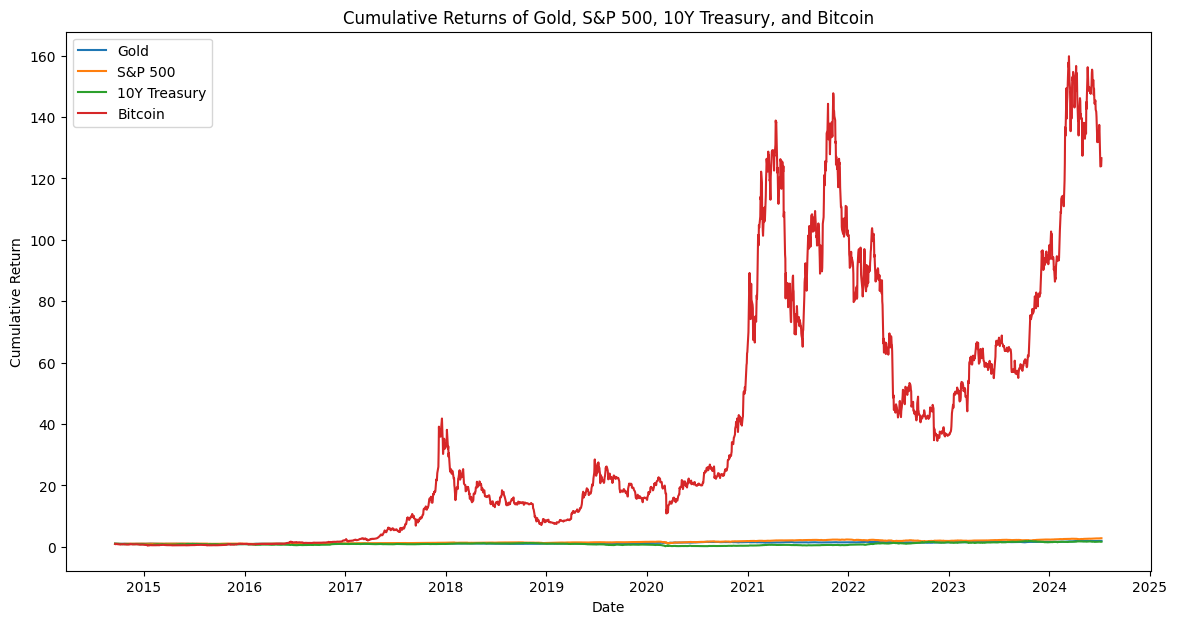

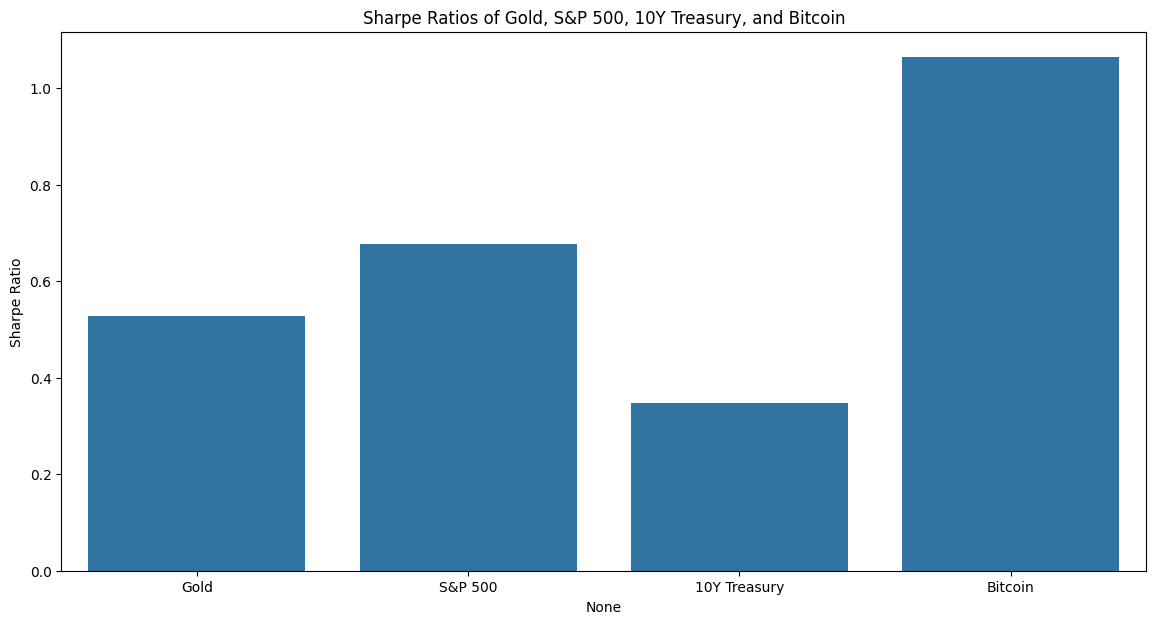

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot cumulative returns
plt.figure(figsize=(14, 7))
for asset in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[asset], label=asset)
plt.legend()
plt.title('Cumulative Returns of Gold, S&P 500, 10Y Treasury, and Bitcoin')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()

# Plot performance metrics
plt.figure(figsize=(14, 7))
sns.barplot(x=performance_metrics.index, y='Sharpe Ratio', data=performance_metrics)
plt.title('Sharpe Ratios of Gold, S&P 500, 10Y Treasury, and Bitcoin')
plt.show()


# Interactive visualization

In [31]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots


In [32]:
# Create the cumulative returns plot
cumulative_fig = go.Figure()
for asset in cumulative_returns.columns:
    cumulative_fig.add_trace(go.Scatter(x=cumulative_returns.index, y=cumulative_returns[asset], mode='lines', name=asset))
cumulative_fig.update_layout(title='Cumulative Returns of Gold, S&P 500, 10Y Treasury, and Bitcoin', xaxis_title='Date', yaxis_title='Cumulative Return')

In [33]:
# Calculate the number of years
num_years = (datetime.strptime(end_date, '%Y-%m-%d') - datetime.strptime(start_date, '%Y-%m-%d')).days / 365.25

# Create the performance metrics bar plot
performance_fig = go.Figure()
for metric in performance_metrics.columns:
    performance_fig.add_trace(go.Bar(x=performance_metrics.index, y=performance_metrics[metric], name=metric))
performance_fig.update_layout(
    title=f'Performance Metrics of Gold, S&P 500, 10Y Treasury, and Bitcoin over {num_years:.1f} Years',
    xaxis_title='Asset',
    yaxis_title='Value',
    barmode='group'
)

# Show the plot
performance_fig.show()

performance_metrics

,Mean Return (%),Volatility (%),Sharpe Ratio
Gold,7.760523,14.716563,0.527333
S&P 500,12.087311,17.880184,0.676017
10Y Treasury,17.484506,50.236584,0.348043
Bitcoin,73.743003,69.347865,1.063378


In [34]:
# Create a subplot layout
fig = make_subplots(rows=2, cols=1, subplot_titles=('Cumulative Returns', 'Performance Metrics'))

In [35]:
# Add cumulative returns plot
for asset in cumulative_returns.columns:
    fig.add_trace(go.Scatter(x=cumulative_returns.index, y=cumulative_returns[asset], mode='lines', name=asset), row=1, col=1)


In [36]:
# Plot total returns
total_returns_fig = px.bar(total_returns_df, x=total_returns_df.index, y='Total Return (%)', title='Total Returns')

total_returns_fig.update_layout(template='plotly_dark')

total_returns_fig.show()